In [ ]:
import pathlib
import tensorflow as tf
import pandas as pd
import pickle

from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

%matplotlib inline


In [ ]:
url = "https://raw.githubusercontent.com/manishkr1754/CarDekho_Used_Car_Price_Prediction/main/notebooks/data/cardekho_dataset.csv"
data_dir = tf.keras.utils.get_file('cardata', origin=url)
data_dir = pathlib.Path(data_dir)

In [ ]:
df = pd.read_csv(data_dir, index_col=[0])
print(df.head())
print('-'*100)
df.info()

        car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000  
--------------------------

In [ ]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


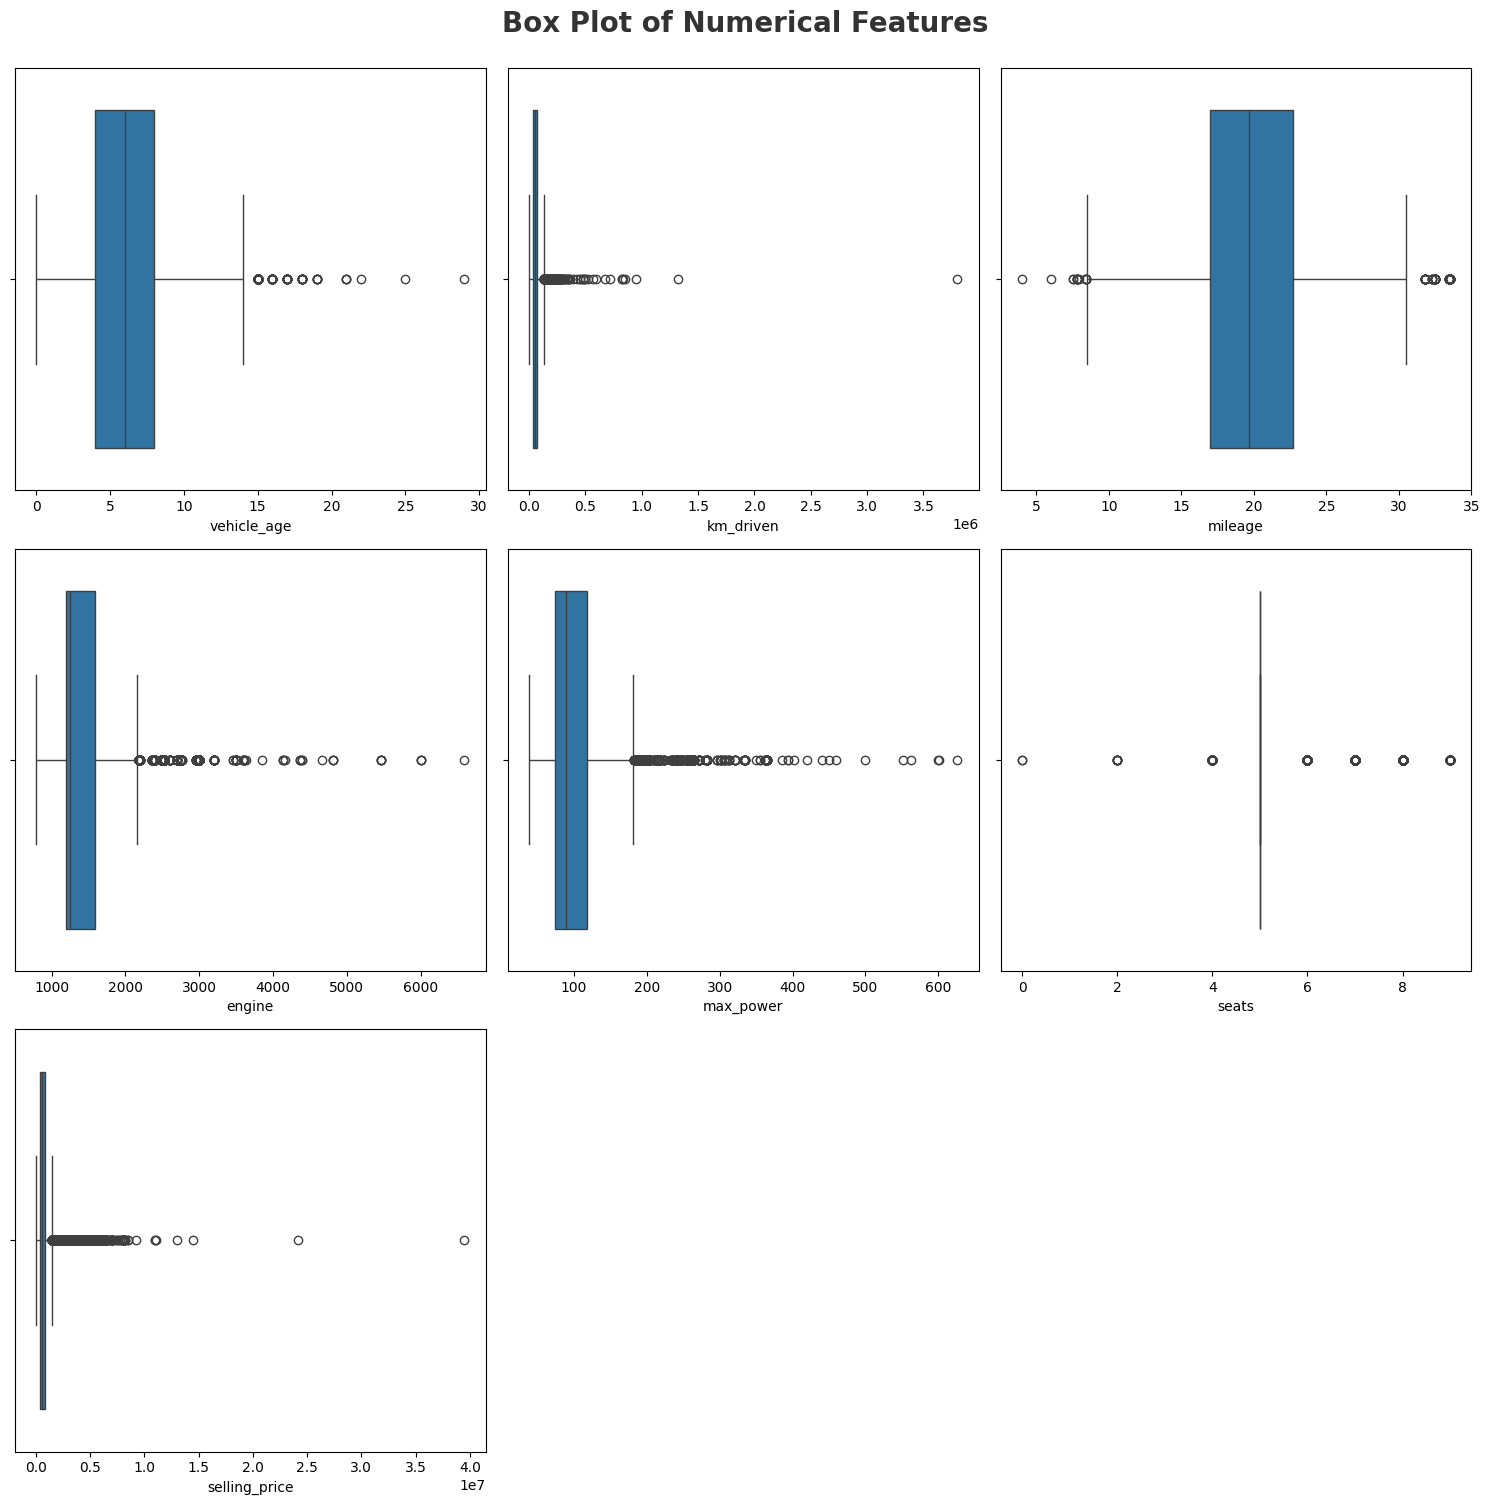

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

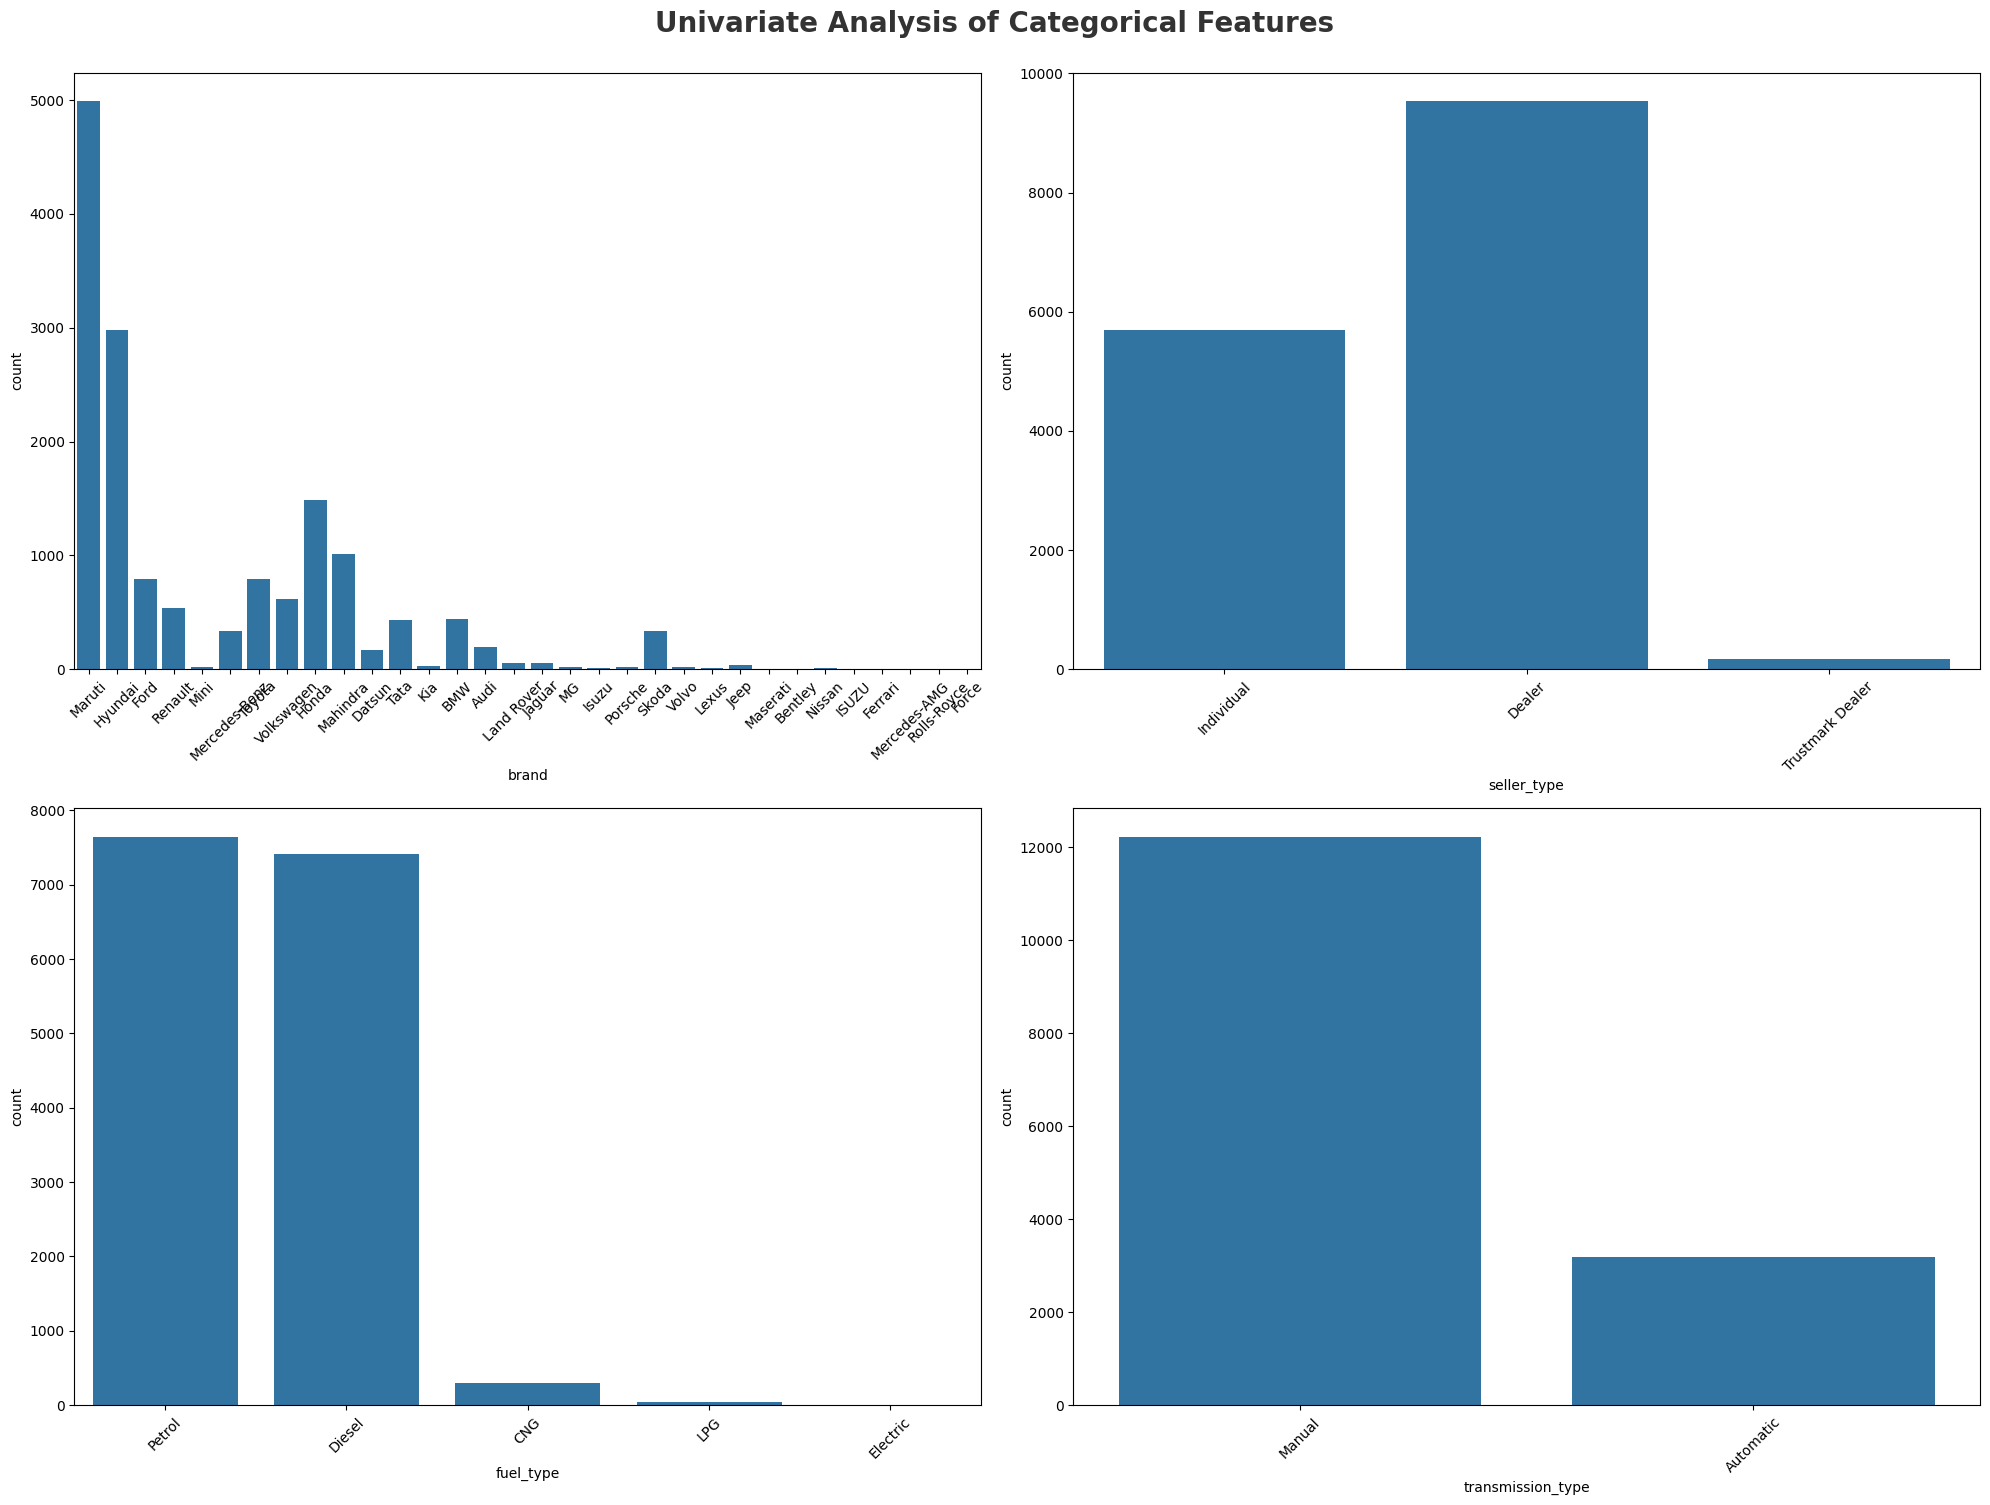

In [ ]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

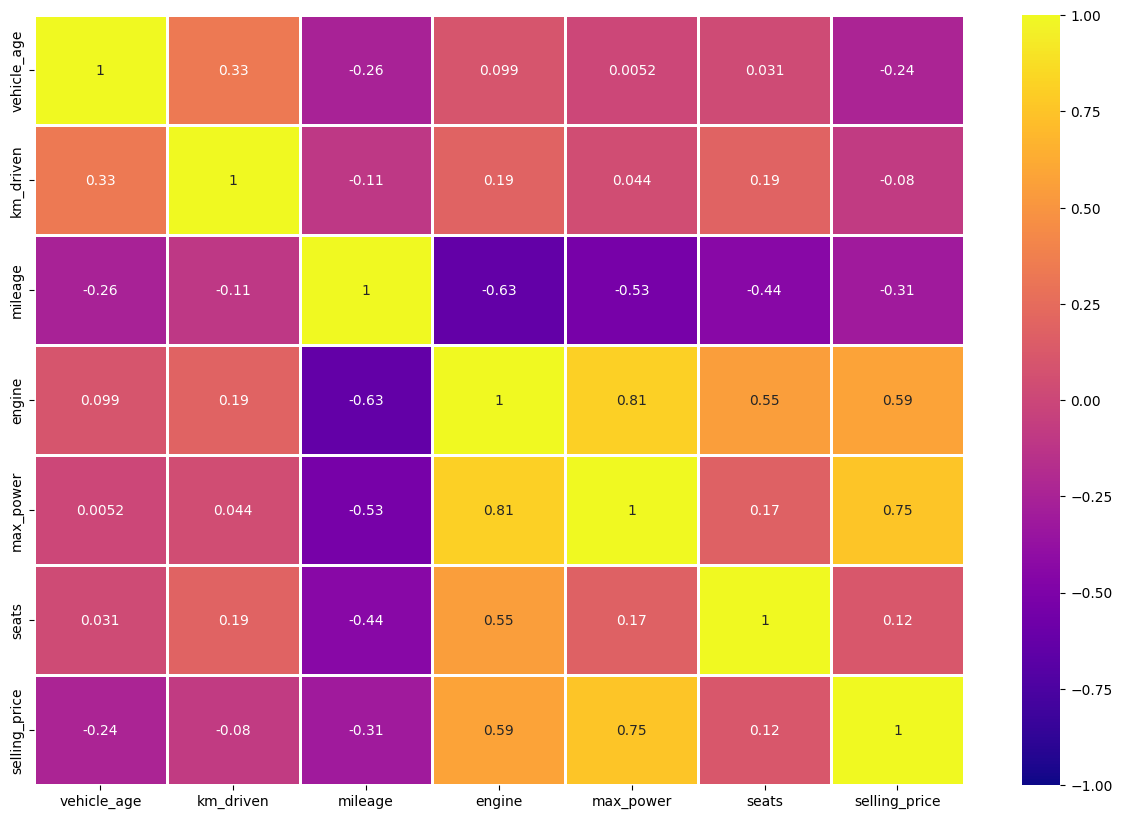

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

In [ ]:
# Run only for one time
df.drop(labels=['car_name','brand','model'],axis=1,inplace=True)

In [ ]:
df=pd.get_dummies(df,dtype=float)
df

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19540,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19541,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19542,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X=df.drop('selling_price',axis=1)      # Feature Matrix
y=df['selling_price']
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
19537     250000
19540     925000
19541     425000
19542    1225000
19543    1200000
Name: selling_price, Length: 15411, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [ ]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))
print(mse)
print(rmse)
print(evs)
print(r_square_score)

[562025350096.4635, 1253697359662.9646, 303507810619.5264, 283314974875.0879, 562023612986.5432, 562024611583.9744]
[749683.4999494543, 1119686.2773397577, 550915.4296437217, 532273.402374276, 749682.3413863656, 749683.0073997772]
[0.531407611029105, 7.09787075908741e-05, 0.7469841092680926, 0.7637678990704413, 0.5314092372795152, 0.5314082278438492]
[0.5312024783162238, -0.045736131031485217, 0.7468375591853962, 0.7636808409895632, 0.5312039272772455, 0.531203094325492]


In [ ]:
for i in range(len(models)):
    print(models[i].__name__)
    print('Mean Squared Error: ', mse[i])
    print('Root Mean Squared Error: ', rmse[i])
    print('Explained Variance Score: ', evs[i])
    print('R2 Score: ', r_square_score[i])
    print('-'*100)
    print('\n')

LinearRegression
Mean Squared Error:  562025350096.4635
Root Mean Squared Error:  749683.4999494543
Explained Variance Score:  0.531407611029105
R2 Score:  0.5312024783162238
----------------------------------------------------------------------------------------------------


SVR
Mean Squared Error:  1253697359662.9646
Root Mean Squared Error:  1119686.2773397577
Explained Variance Score:  7.09787075908741e-05
R2 Score:  -0.045736131031485217
----------------------------------------------------------------------------------------------------


DecisionTreeRegressor
Mean Squared Error:  303507810619.5264
Root Mean Squared Error:  550915.4296437217
Explained Variance Score:  0.7469841092680926
R2 Score:  0.7468375591853962
----------------------------------------------------------------------------------------------------


RandomForestRegressor
Mean Squared Error:  283314974875.0879
Root Mean Squared Error:  532273.402374276
Explained Variance Score:  0.7637678990704413
R2 Score:  0.76

# INFERENCE:  RandomForest performs the best

In [ ]:
model =RandomForestRegressor()
regressor = model.fit(X_train, y_train)

    #  pickle file
model_filename = "RandomForest_model.pkl"
with open(model_filename, 'wb') as model_file:
 pickle.dump(regressor, model_file)

In [ ]:
model =DecisionTreeRegressor()
regressor = model.fit(X_train, y_train)

    #  pickle file
model_filename = "DesTree_model.pkl"
with open(model_filename, 'wb') as model_file:
 pickle.dump(regressor, model_file)

In [ ]:
print(X_test)

       vehicle_age  km_driven  mileage  engine  max_power  seats  \
807              7     144000    26.00    1498      98.60      5   
17915            2       5000    21.21    1197      81.80      5   
8689             7      93334    15.60    1196      70.02      5   
7748             6      96000    20.14    1498      88.80      5   
2577             4      17865    21.40    1197      83.10      5   
...            ...        ...      ...     ...        ...    ...   
9448             5     120000    26.59    1248      74.00      5   
5693             5     134000    12.99    2494     100.60      8   
4609             6      12000    19.10    1197      85.80      5   
19324            2      19587    22.00    1197      81.80      5   
8158             4      76000    14.24    2755     174.50      7   

       seller_type_Dealer  seller_type_Individual  \
807                   0.0                     1.0   
17915                 0.0                     1.0   
8689                  1.

(12328, 16)
